In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from datetime import date, datetime, timedelta

**Part 1**

*Import the raw data set into a Pandas DataFrame. Perform some exploratory analysis on the raw data set. Check for the types of data hygiene issues mentioned in the lesson. Whenever you find a possible issue, write some code to fix it. Apply your fixes systematically, not case-by-case. Be sure to include comments to explain your process.*

In [2]:
songs = pd.read_csv('ml-03-data-processing-songs-dataset.csv')
songs

,Index,Title,Artist,Top Genre,Year,Month,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004.0,10,157.0,30.0,53.0,-14.0,11.0,68.0,201,94.0,3.0,71.0
1,2,Black Night,Deep Purple,album rock,2000.0,3,135.0,79.0,50.0,-11.0,17.0,81.0,207,17.0,7.0,39.0
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001.0,6,168.0,69.0,66.0,-9.0,7.0,52.0,341,2.0,17.0,69.0
3,4,The Pretender,Foo Fighters,alternative metal,2007.0,1,173.0,96.0,43.0,-4.0,3.0,37.0,269,0.0,4.0,76.0
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002.0,8,106.0,82.0,58.0,-5.0,10.0,87.0,256,1.0,3.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,1990,Heartbreak Hotel,Elvis Presley,adult standards,1958.0,4,94.0,21.0,NaN,-12.0,11.0,72.0,128,84.0,7.0,63.0
1990,1991,Hound Dog,Elvis Presley,adult standards,1958.0,6,175.0,76.0,NaN,-8.0,76.0,95.0,136,73.0,6.0,69.0
1991,1992,Johnny B. Goode,Chuck Berry,blues rock,1959.0,4,168.0,80.0,NaN,-9.0,31.0,97.0,162,74.0,7.0,74.0
1992,1993,Take Five,The Dave Brubeck Quartet,bebop,1959.0,10,174.0,26.0,45.0,-13.0,7.0,60.0,324,54.0,4.0,65.0


In [3]:
songs.info()
# Looking at each column to see the type and count of non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Index                   1994 non-null   int64  
 1   Title                   1991 non-null   object 
 2   Artist                  1986 non-null   object 
 3   Top Genre               1986 non-null   object 
 4   Year                    1987 non-null   float64
 5   Month                   1994 non-null   object 
 6   Beats Per Minute (BPM)  1985 non-null   float64
 7   Energy                  1986 non-null   float64
 8   Danceability            970 non-null    float64
 9   Loudness (dB)           1987 non-null   float64
 10  Liveness                1986 non-null   float64
 11  Valence                 960 non-null    float64
 12  Length (Duration)       1985 non-null   object 
 13  Acousticness            1986 non-null   float64
 14  Speechiness             1990 non-null   

array([[<AxesSubplot:title={'center':'Index'}>,
        <AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Beats Per Minute (BPM)'}>],
       [<AxesSubplot:title={'center':'Energy'}>,
        <AxesSubplot:title={'center':'Danceability'}>,
        <AxesSubplot:title={'center':'Loudness (dB)'}>],
       [<AxesSubplot:title={'center':'Liveness'}>,
        <AxesSubplot:title={'center':'Valence'}>,
        <AxesSubplot:title={'center':'Acousticness'}>],
       [<AxesSubplot:title={'center':'Speechiness'}>,
        <AxesSubplot:title={'center':'Popularity'}>, <AxesSubplot:>]],
      dtype=object)

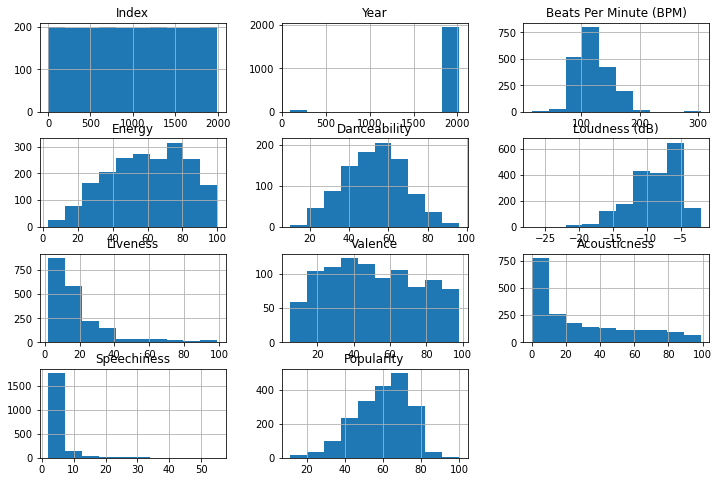

In [4]:
songs.hist(figsize = (12,8))

*Started with the transformations on the Month column*

In [5]:
songs.Month.str.isnumeric().value_counts()

True     1988
False       6
Name: Month, dtype: int64

In [6]:
songs.Month.isna().value_counts()

False    1994
Name: Month, dtype: int64

In [7]:
songs[songs['Month'].str.isnumeric() == False]

,Index,Title,Artist,Top Genre,Year,Month,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
448,449,Titanium (feat. Sia),David Guetta,dance pop,2011.0,Jan,126.0,79.0,NaN,-4.0,13.0,30.0,245,7.0,10.0,67.0
809,810,Immigrant Song - Remaster,Led Zeppelin,album rock,1970.0,Dec,113.0,93.0,NaN,-10.0,35.0,62.0,146,1.0,6.0,77.0
1061,1062,Spread Your Wings - 2011 Mix,Queen,glam rock,1977.0,Sep,175.0,66.0,NaN,-6.0,6.0,46.0,274,28.0,3.0,50.0
1645,1646,Glory Box,Portishead,art pop,1994.0,Apr,120.0,43.0,51.0,-10.0,6.0,NaN,309,18.0,4.0,67.0
1717,1718,Per Spoor (Kedeng Kedeng),Guus Meeuwis,dutch pop,1996.0,Jun,126.0,88.0,NaN,-7.0,15.0,NaN,253,20.0,5.0,49.0
1896,1897,Little Wing,Jimi Hendrix,album rock,1967.0,May,71.0,53.0,52.0,-8.0,5.0,NaN,146,18.0,8.0,69.0


In [8]:
songs['Month'] = songs['Month'].map(lambda x: datetime.strptime(x, '%b').strftime('%m').lstrip('0').replace('0', '') if x.isnumeric() == False else x)

*Then moved to Year after looking at the histogram and seeing there are outliers*

In [9]:
songs[songs['Year'] < 1000]
songs['Year'] = songs['Year'].astype(str).str.replace('92', '1992')
songs['Year'] = songs['Year'].astype(float)
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Index                   1994 non-null   int64  
 1   Title                   1991 non-null   object 
 2   Artist                  1986 non-null   object 
 3   Top Genre               1986 non-null   object 
 4   Year                    1987 non-null   float64
 5   Month                   1994 non-null   object 
 6   Beats Per Minute (BPM)  1985 non-null   float64
 7   Energy                  1986 non-null   float64
 8   Danceability            970 non-null    float64
 9   Loudness (dB)           1987 non-null   float64
 10  Liveness                1986 non-null   float64
 11  Valence                 960 non-null    float64
 12  Length (Duration)       1985 non-null   object 
 13  Acousticness            1986 non-null   float64
 14  Speechiness             1990 non-null   

*Then changed the type for Length (Duration) since it was an object*

In [10]:
songs['Length (Duration)'] = songs['Length (Duration)'].str.replace(',', '').astype(float)
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Index                   1994 non-null   int64  
 1   Title                   1991 non-null   object 
 2   Artist                  1986 non-null   object 
 3   Top Genre               1986 non-null   object 
 4   Year                    1987 non-null   float64
 5   Month                   1994 non-null   object 
 6   Beats Per Minute (BPM)  1985 non-null   float64
 7   Energy                  1986 non-null   float64
 8   Danceability            970 non-null    float64
 9   Loudness (dB)           1987 non-null   float64
 10  Liveness                1986 non-null   float64
 11  Valence                 960 non-null    float64
 12  Length (Duration)       1985 non-null   float64
 13  Acousticness            1986 non-null   float64
 14  Speechiness             1990 non-null   

**Part 2**

*Find the number of missing values in each column and each row. Remove the rows where at least 50% of the values are missing. Then remove columns where at least 50% of the values are missing.*

In [11]:
# Removes any row that is missing more than 50% of its data

for i in songs.Index:
    sum_na = songs.loc[[i-1]].isna().sum().sum()
    if (sum_na/len(songs.columns)) > 0.5:
        # print(i-1, sum_na)
        songs.drop(index = (i-1), axis = 0, inplace = True)

# OR
# songs = songs.dropna(axis = 0, thresh = (len(songs.columns)/2))

# Drops the rows who indeces are equal to 664, 775, 1331, 1442, 1553, 1664, and 1775


In [12]:
# Removes any column that is missing more than 50% of its data
for column in songs:
    sum_na = songs[column].isna().sum()
    if sum_na > (len(songs)/2): 
        # print(column)
        songs.drop(columns = {column}, axis = 1, inplace = True)

# Drops the Danceability and Valence columns

**Part 3**

*Calculate descriptive statistics for each column. Let's define an outlier as a value at least 3 standard deviations away from the mean. Which columns have outliers? What are those values?*

In [13]:
songs.describe()
# Looks at the descriptive statistics for the continuous (numerical) columns

,Index,Year,Beats Per Minute (BPM),Energy,Loudness (dB),Liveness,Length (Duration),Acousticness,Speechiness,Popularity
count,1987.000000,1984.000000,1983.000000,1983.000000,1983.000000,1983.000000,1982.000000,1984.000000,1986.00000,1985.000000
mean,996.378460,1992.986391,120.234493,59.653555,-9.013616,19.019667,262.616549,28.916835,4.99144,59.511839
std,575.975329,16.112981,28.639923,22.170414,3.653139,16.750412,93.819708,29.028802,4.40705,14.366705
min,1.000000,1956.000000,15.000000,3.000000,-27.000000,2.000000,93.000000,0.000000,2.00000,11.000000
25%,497.500000,1979.000000,99.000000,42.000000,-11.000000,9.000000,212.000000,3.000000,3.00000,49.000000
50%,996.000000,1993.000000,119.000000,61.000000,-8.000000,12.000000,245.000000,18.000000,4.00000,62.000000
75%,1494.500000,2007.000000,136.000000,78.000000,-6.000000,23.000000,290.000000,50.000000,5.00000,71.000000
max,1994.000000,2019.000000,305.000000,100.000000,-2.000000,99.000000,1412.000000,99.000000,55.00000,100.000000


In [14]:
songs['Artist'].describe(), songs['Title'].describe(), songs['Top Genre'].describe()
# Looks at the descriptive statistics for the categorical columns

(count      1984
 unique      729
 top       Queen
 freq         37
 Name: Artist, dtype: object,
 count           1987
 unique          1951
 top       Hallelujah
 freq               3
 Name: Title, dtype: object,
 count           1983
 unique           149
 top       album rock
 freq             410
 Name: Top Genre, dtype: object)

In [15]:
Index_outliers = []
Year_outliers = []
Month_outliers = []
BPM_outliers = []
Energy_outliers = []
Loudness_outliers = []
Liveness_outliers = []
Length_outliers = []
Acousticness_outliers = []
Speech_outliers = []
Popularity_outliers = []

for column in songs.describe():
    if column != 'Index' and column != 'Year' and column != 'Month':
        std_3 = (songs[column].describe()['mean'] - songs[column].describe()['std'])*3
        std_neg3 = std_3 * (-1)
        if std_3 < std_neg3:
            # Making sure that std_3 is equal to the positive 3 standard deviations away from the mean and that std_neg3 is equal to 3 negative standard deviations away from the mean
            std_3 = (std_3 * (-1))
            std_neg3 = (std_neg3 * (-1))
        for value in songs[column]:
            if value > std_3 or value < std_neg3:
                if column == 'Beats Per Minute (BPM)':
                    if value not in BPM_outliers:
                    # Use if you don't want multiples
                        BPM_outliers.append(value)
                elif column == 'Energy':
                    if value not in Energy_outliers:
                    # Use if you don't want multiples
                        Energy_outliers.append(value)
                elif column == 'Loudness (dB)':
                    if value not in Loudness_outliers:
                    # Use if you don't want multiples
                        Loudness_outliers.append(value)
                elif column == 'Liveness':
                    if value not in Liveness_outliers:
                    # Use if you don't want multiples
                        Liveness_outliers.append(value)
                elif column == 'Length (Duration)':
                    if value not in Length_outliers:
                    # Use if you don't want multiples
                        Length_outliers.append(value)
                elif column == 'Acousticness':
                    if value not in Acousticness_outliers:
                    # Use if you don't want multiples
                        Acousticness_outliers.append(value)
                elif column == 'Speechiness':
                    if value not in Speech_outliers:
                    # Use if you don't want multiples
                        Speech_outliers.append(value)
                else:
                    if value not in Popularity_outliers:
                    # Use if you don't want multiples
                        Popularity_outliers.append(value)

print('Index:', Index_outliers)
print('Year:', Year_outliers)
print('Month:', Month_outliers)
print('Beats Per Minute (BPM):', BPM_outliers)
print('Energy:', Energy_outliers)
print('Loudness:', Loudness_outliers)
print('Liveness:', Liveness_outliers)
print('Length (Duration):', Length_outliers)
print('Acousticness:', Acousticness_outliers)
print('Speechiness:', Speech_outliers)
print('Popularity:', Popularity_outliers)

Index: []
Year: []
Month: []
Beats Per Minute (BPM): [305.0, 297.0]
Energy: []
Loudness: []
Liveness: [11.0, 17.0, 7.0, 10.0, 14.0, 13.0, 12.0, 24.0, 26.0, 53.0, 81.0, 16.0, 9.0, 63.0, 23.0, 8.0, 33.0, 20.0, 29.0, 15.0, 48.0, 19.0, 37.0, 35.0, 70.0, 57.0, 18.0, 28.0, 25.0, 22.0, 43.0, 42.0, 61.0, 38.0, 36.0, 32.0, 93.0, 21.0, 60.0, 58.0, 79.0, 30.0, 40.0, 51.0, 27.0, 31.0, 97.0, 34.0, 83.0, 39.0, 52.0, 72.0, 64.0, 46.0, 66.0, 87.0, 96.0, 55.0, 71.0, 59.0, 99.0, 92.0, 78.0, 62.0, 67.0, 95.0, 90.0, 44.0, 47.0, 69.0, 91.0, 68.0, 85.0, 89.0, 76.0, 73.0, 54.0, 41.0, 86.0, 45.0, 50.0, 82.0, 77.0, 65.0, 56.0, 98.0, 94.0, 84.0, 80.0]
Length (Duration): [639.0, 629.0, 602.0, 526.0, 809.0, 532.0, 598.0, 671.0, 620.0, 663.0, 1412.0, 517.0, 511.0, 581.0, 1121.0, 559.0, 575.0, 1367.0, 811.0, 508.0, 576.0, 525.0, 715.0, 513.0, 653.0, 590.0, 966.0, 859.0, 521.0, 515.0, 659.0, 536.0, 564.0, 527.0, 703.0, 1292.0]
Acousticness: [94.0, 17.0, 2.0, 1.0, 6.0, 88.0, 18.0, 84.0, 57.0, 16.0, 5.0, 48.0, 7.0, 92

**Part 4**

*With the remaining columns, use scikit-learn to impute missing values. For continuous features, fill in the mean. For categorical features, fill in the mode.*

In [16]:
cont_columns = ['Beats Per Minute (BPM)', 'Energy', 'Loudness (dB)', 'Length (Duration)', 'Liveness', 'Acousticness', 'Speechiness', 'Popularity']
imp_mean = SimpleImputer(missing_values = np.nan, strategy = 'mean')
for i in cont_columns:
    songs[i] = imp_mean.fit_transform(songs[[i]])

songs.isna().sum()

Index                     0
Title                     0
Artist                    3
Top Genre                 4
Year                      3
Month                     0
Beats Per Minute (BPM)    0
Energy                    0
Loudness (dB)             0
Liveness                  0
Length (Duration)         0
Acousticness              0
Speechiness               0
Popularity                0
dtype: int64

In [17]:
cat_columns = ['Artist', 'Top Genre', 'Title', 'Year']
imp_mode = SimpleImputer(missing_values = np.nan, strategy = "most_frequent")

for i in cat_columns:
    songs[i] = imp_mode.fit_transform(songs[[i]])

songs.isna().sum()

Index                     0
Title                     0
Artist                    0
Top Genre                 0
Year                      0
Month                     0
Beats Per Minute (BPM)    0
Energy                    0
Loudness (dB)             0
Liveness                  0
Length (Duration)         0
Acousticness              0
Speechiness               0
Popularity                0
dtype: int64

**Part 5**

*Combine the date-related columns into one column with the Pandas to_datetime() method, then use that column to create a numeric Age column (in years). Calculate Age based on today's date; it doesn't have to be a whole number. Once you've created the Age column, remove the other date-related columns, including the one you created with Pandas.*

In [18]:
songs['Day'] = 1
songs['Date'] = pd.to_datetime(songs[['Year', 'Month', 'Day']], format = "%Y/%m/%d")
songs['Today'] = pd.to_datetime('now')

songs['Age'] = ((songs['Today']- songs['Date'])/365).astype(str).str.slice(0,2) + ' years'

songs.drop(columns = {'Day', 'Month', 'Year', 'Date', 'Today'}, axis = 1, inplace = True)
songs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1993
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Index                   1987 non-null   int64  
 1   Title                   1987 non-null   object 
 2   Artist                  1987 non-null   object 
 3   Top Genre               1987 non-null   object 
 4   Beats Per Minute (BPM)  1987 non-null   float64
 5   Energy                  1987 non-null   float64
 6   Loudness (dB)           1987 non-null   float64
 7   Liveness                1987 non-null   float64
 8   Length (Duration)       1987 non-null   float64
 9   Acousticness            1987 non-null   float64
 10  Speechiness             1987 non-null   float64
 11  Popularity              1987 non-null   float64
 12  Age                     1987 non-null   object 
dtypes: float64(8), int64(1), object(4)
memory usage: 281.9+ KB


c:\Users\kylee\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


**Part 6**

*Create dummy variables for the categorical features. Drop one level of each feature to end up with k-1 dummies, not k.*

In [19]:
songs = pd.get_dummies(songs, columns = ['Top Genre', 'Artist'], drop_first = True)
songs
# Makes a binary column for every single category and drops the first column so if every single value in a row is 0 then it is that first column

,Index,Title,Beats Per Minute (BPM),Energy,Loudness (dB),Liveness,Length (Duration),Acousticness,Speechiness,Popularity,...,Artist_Yann Tiersen,Artist_Yes,Artist_Youp van 't Hek,Artist_Youssou N'Dour,Artist_Yusuf / Cat Stevens,Artist_ZZ Top,Artist_Zucchero,Artist_a-ha,Artist_blink-182,Artist_Édith Piaf
0,1,Sunrise,157.0,30.0,-14.0,11.0,201.0,94.0,3.0,71.0,...,0,0,0,0,0,0,0,0,0,0
1,2,Black Night,135.0,79.0,-11.0,17.0,207.0,17.0,7.0,39.0,...,0,0,0,0,0,0,0,0,0,0
2,3,Clint Eastwood,168.0,69.0,-9.0,7.0,341.0,2.0,17.0,69.0,...,0,0,0,0,0,0,0,0,0,0
3,4,The Pretender,173.0,96.0,-4.0,3.0,269.0,0.0,4.0,76.0,...,0,0,0,0,0,0,0,0,0,0
4,5,Waitin' On A Sunny Day,106.0,82.0,-5.0,10.0,256.0,1.0,3.0,59.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,1990,Heartbreak Hotel,94.0,21.0,-12.0,11.0,128.0,84.0,7.0,63.0,...,0,0,0,0,0,0,0,0,0,0
1990,1991,Hound Dog,175.0,76.0,-8.0,76.0,136.0,73.0,6.0,69.0,...,0,0,0,0,0,0,0,0,0,0
1991,1992,Johnny B. Goode,168.0,80.0,-9.0,31.0,162.0,74.0,7.0,74.0,...,0,0,0,0,0,0,0,0,0,0
1992,1993,Take Five,174.0,26.0,-13.0,7.0,324.0,54.0,4.0,65.0,...,0,0,0,0,0,0,0,0,0,0
